# Does long term correlation exist?  USA Historical Crime Rate vs Economy

#### An AI Data Planet Demo
What historical data of 55 years (1960-2014) can tell us:

Public dataset source:

Crimes in USA dataset:
https://www.kaggle.com/ibrahimbahbah/crimes-in-usa-from-1960-to-2014

Dow Jones historical price dataset:
https://www.macrotrends.net/1319/dow-jones-100-year-historical-chart

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
# read in two datasets:
path_crime="US_Crime_vs_DOW/us_crime_1960_2014.csv"
df_crime = pd.read_csv(path_crime)
path_dow_jones="US_Crime_vs_DOW/Dow_yearly_1959_2014.csv"
df_dow_jonse = pd.read_csv(path_dow_jones,thousands=',')

### JOIN the two datasets:

In [2]:
df = df_crime.merge(df_dow_jonse, on="Year")

### Calculate yearly (total & violent) crime rate (per 10,000 population):

In [3]:
 
violent_crime=np.array(df['Violent crime total'])
property_crime=np.array(df['Property crime total'])

population = np.array(df['Population'])
violent_crime_per_10000 = violent_crime/population*10000
total_crime_per_10000 = (violent_crime+property_crime)/population*10000

# obtain a 5-year moving average for violent/total_crime_per_10000:
violent_crime_per_10000_1 = np.convolve(violent_crime_per_10000, np.ones(5)/5, mode='valid')
total_crime_per_10000_1 = np.convolve(total_crime_per_10000, np.ones(5)/5, mode='valid')

### Calculate yearly Dow Jones "Average Closing Price", scaled to 1:100 (for ploting purpose)

In [4]:
dow_average = np.array(df['Average Closing Price'])
dow_average  = 0.01*dow_average     #scaled to 1:100 (for ploting purpose)

# obtain a 5-year moving average for Dow:
dow_average1 = np.convolve(dow_average, np.ones(5)/5, mode='valid')

### Plot yearly Crime Rate vs Dow Jones Index for visual inspection:

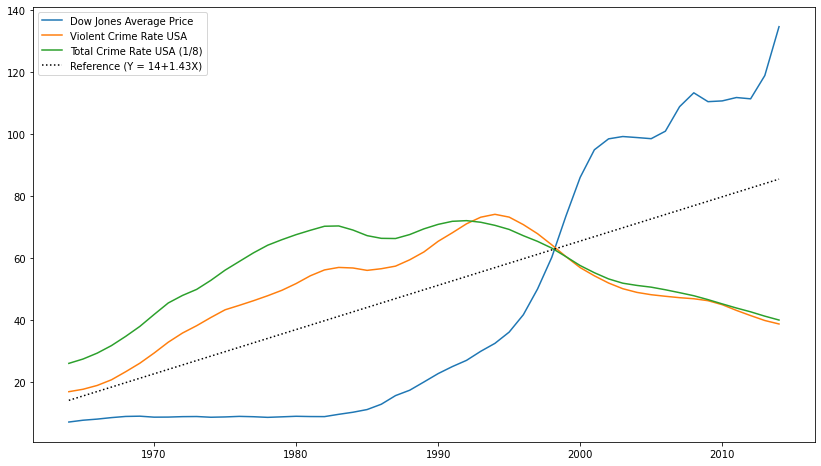

In [8]:
plt.figure(figsize=(14,8))
x_1 = x[4:]
p1 = plt.plot(x_1,dow_average1)
p2 = plt.plot(x_1,violent_crime_per_10000_1)
p3 = plt.plot(x_1,total_crime_per_10000_1/8)


#just for fun, add a manually calculated reference straightline to make the correlation more obvious:
a=14; b=1.43; line = np.array([a + i*b for i in range(51)]); p4 =  plt.plot(x_1,line,'k:')
plt.legend(["Dow Jones Average Price","Violent Crime Rate USA", "Total Crime Rate USA (1/8)","Reference (Y = 14+1.43X)"])

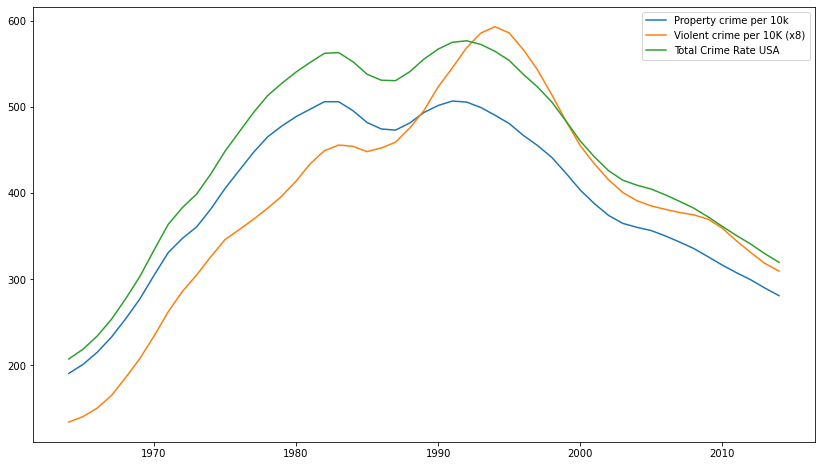

In [6]:
plt.figure(figsize=(14,8))
property_crime_per_10000 = property_crime/population*10000
property_crime_per_10000_1 = np.convolve(property_crime_per_10000, np.ones(5)/5, mode='valid')
plt.plot(x_1,property_crime_per_10000_1)
plt.plot(x_1,8*violent_crime_per_10000_1)
p3 = plt.plot(x_1,total_crime_per_10000_1)
plt.legend([ "Property crime per 10k","Violent crime per 10K (x8)","Total Crime Rate USA"])